In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd /content/drive/My Drive/machine_learning_cl

/content/drive/My Drive/machine_learning_cl


In [0]:
import csv

#train data
x_data = []
y_data = []
z_data = []
h_data = []

#test_data
xt_data = []
yt_data = []
zt_data = []
ht_data = []

with open('data_train.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
      x_data.append(float(i[0]))
      y_data.append(float(i[1]))
      z_data.append(float(i[2]))
      h_data.append(float(i[3]))
      #print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
      ct += 1

with open('data_test.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
        xt_data.append(float(i[0]))
        yt_data.append(float(i[1]))
        zt_data.append(float(i[2]))
        ht_data.append(float(i[3]))
        #print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        ct += 1


In [0]:
import numpy as np
import random 
import matplotlib.pyplot as plt

#Hypothesis & Object function


Hypothesis (Linear Model)

$$f_\theta(x,y,z)=\theta_0+\theta_1x + \theta_2y + \theta_3z, \\
where\\ \theta = (\theta_0, \theta_1, \theta_2, \theta_3) \in R $$

Objective funtion(cost function)
$$
J(\theta)=\frac{1}{2m} \sum_{i=1}^m (\theta_0+\theta_1x + \theta_2y + \theta_3z−h^{(i)})^2
$$

In [0]:
x = np.array(x_data)
y = np.array(y_data)
z = np.array(z_data)
H = np.array(h_data)

## hypothesis
def h(th0, th1, th2, th3, x, y, z):
    hypo = th0 + th1*(x) + th2*(y) + th3*(z)
    return hypo

## cost function
def J(th0, th1, th2, th3, ep_val, x, y, z):
    cost = (1/(2*len(x)))*np.sum((h(th0, th1, th2, th3, x, y, z)-ep_val)**2)
    return cost


In [7]:
print(len(x))

300


# Training Data - GD Algorithm for linear regression
$$
\theta_0^{(t+1)} : = \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\theta_0+\theta_1x + \theta_2y + \theta_3z−h^{(i)})
$$
$$
\theta_1^{(t+1)} : = \theta_1^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\theta_0+\theta_1x + \theta_2y + \theta_3z−h^{(i)}) x^{(i)}
$$
$$
\theta_2^{(t+1)} : = \theta_2^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\theta_0+\theta_1x + \theta_2y + \theta_3z−h^{(i)}) y^{(i)}
$$
$$
\theta_3^{(t+1)} : = \theta_3^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\theta_0+\theta_1x + \theta_2y + \theta_3z−h^{(i)}) z^{(i)}
$$

In [8]:
# list for graph 
list_th0 = []
list_th1 = []
list_th2 = []
list_th3 = []
list_J = []

## settings for GD algorithm
itr = np.arange(20000)+1
th0 = -1
th1 = -1 
th2 = -1
th3 = -1
a = 0.00002

### GD Algorithm 
## performing gd algorithm - training 

for iteration in np.ndenumerate(itr):

    cost = J(th0, th1, th2, th3, H, x, y, z)
    list_th0.append(th0)
    list_th1.append(th1)
    list_th2.append(th2)
    list_th3.append(th3)
    list_J.append(cost)

    temp0 = th0 - a *(1/len(H))*np.sum((h(th0, th1, th2, th3, x, y, z)-H))
    temp1 = th1 - a *(1/len(H))*np.sum((h(th0, th1, th2, th3, x, y, z)-H)*(x))
    temp2 = th2 - a *(1/len(H))*np.sum((h(th0, th1, th2, th3, x, y, z)-H)*(y))
    temp3 = th3 - a *(1/len(H))*np.sum((h(th0, th1, th2, th3, x, y, z)-H)*(z))

    th0 = temp0
    th1 = temp1
    th2 = temp2
    th3 = temp3

    print("iteration : ", iteration)
    print("cost : ", cost)
    print("theta0 : ", th0, "theta1 : ", th1, "theta2 : ", 
          th2, "theta3 : ", th3 )


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
theta0 :  -1.0143314410579758 theta1 :  0.7926994767861051 theta2 :  -1.794652599849218 theta3 :  4.007521058144162
iteration :  ((18334,), 18335)
cost :  103.45779551494527
theta0 :  -1.0143323287092754 theta1 :  0.7926998092984975 theta2 :  -1.794652904040673 theta3 :  4.007521033901379
iteration :  ((18335,), 18336)
cost :  103.45779546536697
theta0 :  -1.0143332163548906 theta1 :  0.7927001416789766 theta2 :  -1.79465320811061 theta3 :  4.0075210096691105
iteration :  ((18336,), 18337)
cost :  103.45779541579726
theta0 :  -1.014334103994822 theta1 :  0.7927004739275936 theta2 :  -1.7946535120590776 theta3 :  4.007520985447351
iteration :  ((18337,), 18338)
cost :  103.45779536623613
theta0 :  -1.01433499162907 theta1 :  0.7927008060444014 theta2 :  -1.7946538158861223 theta3 :  4.007520961236097
iteration :  ((18338,), 18339)
cost :  103.4577953166837
theta0 :  -1.0143358792576354 theta1 :  0.7927011380294503 theta2 :  -1.794654119591793 theta3 :

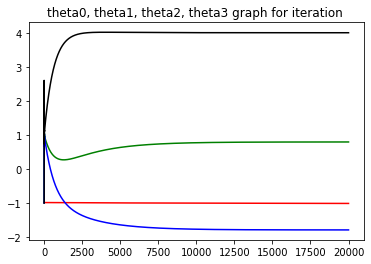

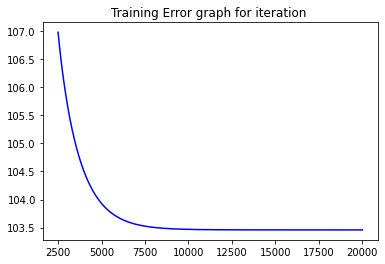

In [9]:
#theta0, theta1, theta2, theta3
plt.title("theta0, theta1, theta2, theta3 graph for iteration ")
plt.plot(itr, np.array(list_th0), color = 'red')
plt.plot(itr, np.array(list_th1), color = 'green')
plt.plot(itr, np.array(list_th2), color = 'blue')
plt.plot(itr, np.array(list_th3), color = 'black')
plt.show()


#J(th0, th1, th2, th3 )
plt.title("Training Error graph for iteration ")
plt.plot(itr[2500:], np.array(list_J[2500:]), color = 'blue' )
plt.show()

In [11]:
print(th0, th1, th2, th3)

-1.0158027337935776 0.793104596283767 -1.7950222695895643 4.007492530101878


In [13]:
## Check the theta values by Normal Equationtheta

import numpy.linalg as lin 

a = np.ones(300)
np.c_[a, x, y, z]
b = np.column_stack([a, x, y, z])

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
b_transpose = np.transpose(b)
b_transpose_dot_b = b_transpose.dot(b)
temp_1 = np.linalg.inv(b_transpose_dot_b)
temp_2=b_transpose.dot(H)
theta =temp_1.dot(temp_2)
print(theta)


[-1.19220481  0.79285367 -1.7943636   4.00796887]


# Testing / Loss

In [18]:
# data and parameter for testing 
xt = np.array(xt_data)
yt = np.array(yt_data)
zt = np.array(zt_data)
Ht = np.array(ht_data)

th0_t = th0
th1_t = th1
th2_t = th2
th3_t = th3

# Testing loss
list_th0_t = []
list_th1_t = []
list_th2_t = []
list_th3_t = []
list_J_t = []
a = 0.000022

itr = np.arange(20000)+1

for iteration in np.ndenumerate(itr):
    
    cost = J(th0_t, th1_t, th2_t, th3_t, Ht, xt, yt, zt)

    list_th0_t.append(th0_t)
    list_th1_t.append(th1_t)
    list_th2_t.append(th2_t)
    list_th3_t.append(th3_t)
    list_J_t.append(cost)

    temp0 = th0_t - a *(1/len(Ht))*np.sum((h(th0_t, th1_t, th2_t, th3_t, xt, yt, zt)-Ht))
    temp1 = th1_t - a *(1/len(Ht))*np.sum((h(th0_t, th1_t, th2_t, th3_t, xt, yt, zt)-Ht)*(xt))
    temp2 = th2_t - a *(1/len(Ht))*np.sum((h(th0_t, th1_t, th2_t, th3_t, xt, yt, zt)-Ht)*(yt))
    temp3 = th3_t - a *(1/len(Ht))*np.sum((h(th0_t, th1_t, th2_t, th3_t, xt, yt, zt)-Ht)*(zt))

    th0_t = temp0
    th1_t = temp1
    th2_t = temp2
    th3_t = temp3

    print("iteration : ", iteration)
    print("cost : ", cost)
    print("theta0 : ", th0_t, "theta1 : ", th1_t, "theta2 : ", 
          th2_t, "theta3 : ", th3_t )


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
theta0 :  -0.9178524666183805 theta1 :  1.0048569583187044 theta2 :  -1.9967578444512595 theta3 :  3.996486142784365
iteration :  ((18334,), 18335)
cost :  0.10537635550876573
theta0 :  -0.9178474152459225 theta1 :  1.0048569802006 theta2 :  -1.9967579061299345 theta3 :  3.9964861573779036
iteration :  ((18335,), 18336)
cost :  0.10537519547291752
theta0 :  -0.9178423639013179 theta1 :  1.004857002062508 theta2 :  -1.9967579677903537 theta3 :  3.996486171973301
iteration :  ((18336,), 18337)
cost :  0.10537403544999933
theta0 :  -0.9178373125845665 theta1 :  1.004857023904436 theta2 :  -1.9967580294325251 theta3 :  3.996486186570556
iteration :  ((18337,), 18338)
cost :  0.10537287544001336
theta0 :  -0.9178322612956681 theta1 :  1.0048570457263926 theta2 :  -1.996758091056456 theta3 :  3.9964862011696685
iteration :  ((18338,), 18339)
cost :  0.10537171544295805
theta0 :  -0.9178272100346225 theta1 :  1.0048570675283854 theta2 :  -1.9967581526621536

In [19]:
## Check the theta values by Normal Equationtheta

import numpy.linalg as lin 

a = np.ones(300)
np.c_[a, xt, yt, zt]
b = np.column_stack([a, xt, yt, zt])

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

b_transpose = np.transpose(b)
b_transpose_dot_b = b_transpose.dot(b)
temp_1 = np.linalg.inv(b_transpose_dot_b)
temp_2=b_transpose.dot(Ht)
theta =temp_1.dot(temp_2)
print(theta)

print(th0_t, th1_t, th2_t, th3_t)

[-1.39152689e-10  1.00000000e+00 -2.00000000e+00  4.00000000e+00]
-0.9094753791264854 1.0048710776460277 -1.9968401401610336 3.9965125082545523


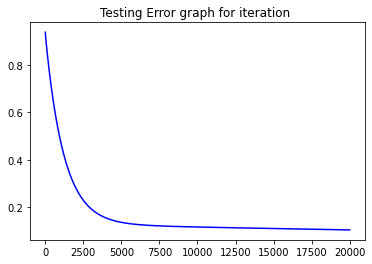

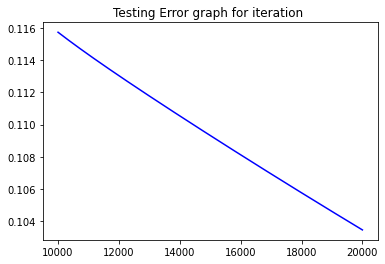

In [21]:
#J(th0, th1, th2, th3 )
plt.title("Testing Error graph for iteration ")
plt.plot(itr, np.array(list_J_t), color = 'blue' )
plt.show()

plt.title("Testing Error graph for iteration ")
plt.plot(itr[10000:], np.array(list_J_t[10000:]), color = 'blue' )
plt.show()